In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

x_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = x_train.astype("float32") / 255

In [4]:
import keras

In [ ]:
input_shape = (784,)
#encoder = keras.models.Sequential([keras.layers.Dense(2)])
#decoder = keras.models.Sequential([keras.layers.Dense(input_shape[0])])

stacked_encoder = keras.models.Sequential([
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
        ])

stacked_decoder = keras.models.Sequential([
        keras.layers.Dense(100, activation="relu", input_shape=[10]),
        keras.layers.Dense(input_shape[0], activation="sigmoid"),
        ])



autoencoder = keras.Sequential([
        keras.layers.Input(shape=input_shape),
        stacked_encoder, 
        stacked_decoder
])
autoencoder.summary()


c:\Users\marco\Dropbox\Code\JUPYTER\DSM2024\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 10)             │        84,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 784)            │        46,134 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,194 (508.57 KB)

 Trainable params: 130,194 (508.57 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
autoencoder.compile(loss="mse", optimizer='adam')
history = autoencoder.fit(x_train.values, x_train.values, epochs=40)
codings = stacked_encoder.predict(x_train)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0830
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0673
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0675
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0673
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0673
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0673
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0674
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0674
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0673
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0674
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0672
Epoch 12/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0670
Epoch 13/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0674
Epoch 14/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0674
Epoch 15/40
1875/1875 ━━━━━━━

In [29]:
T = codings

In [30]:
np.array([x_train.values[0]]).shape

(1, 784)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


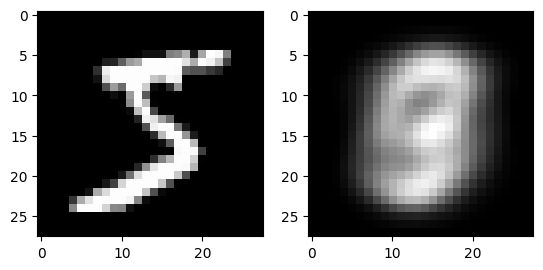

In [31]:
#autoencoder.predict(x_train.values)
gen_img = autoencoder.predict(np.array([x_train.values[0]]))
plt.subplot(1,2,1)
plt.imshow(x_train.values[0].reshape(28,28), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gen_img.reshape(28,28), cmap='gray')
plt.show()

In [32]:
x_train.values[0].shape

(784,)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


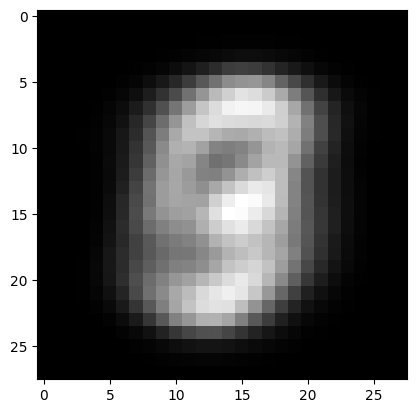

In [33]:
arr = np.array([[0,0,0,0,0,0,0,0,0,1]])
gen_img = stacked_decoder.predict(arr)
plt.imshow(gen_img.reshape(28,28), cmap='gray')
plt.show()